# EDA Exploratory Data Analysis

- Load the Data
- Find information of data like number of rows, number of columns
- Find column names and data types of different columns
- Find Which columns are categorical (nominal / ordinal) or continuous
- Find missing values are present or not
- Plot the graphs of different columns and try to understand the nature of different columns
- Find outliers and columns with outliers
- Standardize the data
- Treat missing values
- Treat outliers
- Find columns which are correlated with each other
- Find the important components of data using PCA (Principle Component Analysis)
-


In [ ]:
import pandas as pd
df = pd.read_csv("EmployeeAttrition.csv")

In [ ]:
df.shape

(1470, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<Axes: >

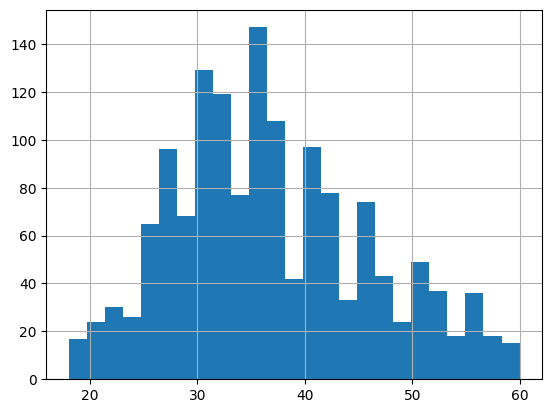

In [ ]:
df['Age'].hist(bins=25)

In [ ]:
import matplotlib.pyplot as plt
for col in df.columns:
    df[col].hist()
    # plt.show()
    plt.savefig(col+".jpg")
    plt.close()

<Axes: >

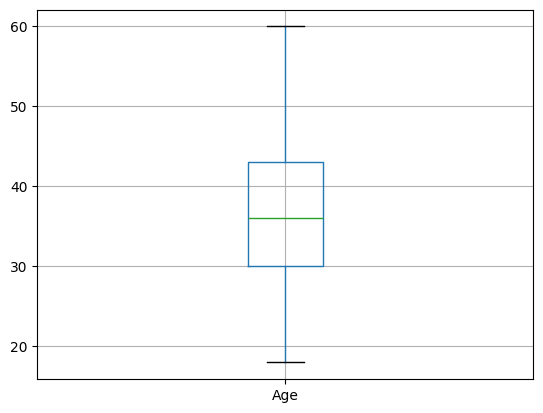

In [ ]:
df[['Age']].boxplot()

In [ ]:
for col in df.select_dtypes(exclude="object").columns:
    df[[col]].boxplot()
    # plt.show()
    plt.savefig(col+"_boxplot.jpg")
    plt.close()

<Axes: >

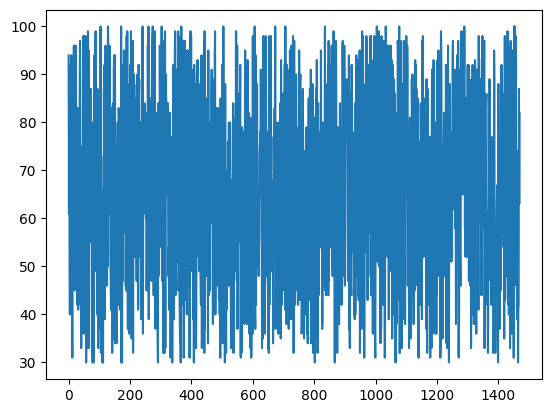

In [ ]:
df['HourlyRate'].plot()

<Axes: >

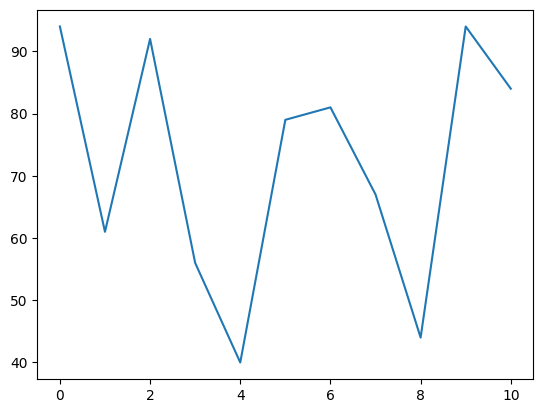

In [ ]:
df.loc[0:10,'HourlyRate'].plot()

## Find Which columns are categorical (nominal / ordinal) or continuous

In [ ]:
df.nunique()

,0
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.columns[df.nunique() < 10]

Index(['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance'],
      dtype='object')

In [ ]:
df.select_dtypes(include = "object")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [ ]:
df.select_dtypes(exclude = "object")

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


## Check if missing values are present

In [ ]:
df.isna().sum()#axis=0

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


## Standardise the data

- standard scalar (z-score)

In [ ]:
df_num = df.select_dtypes(exclude = "object")

In [ ]:
df_std = (df_num - df_num.mean()) / df_num.std()

In [ ]:
df_std.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1470.0,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,...,1.470000e+03,0.0,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03
mean,-1.389667e-17,5.075305e-17,6.525392e-17,4.833624e-18,0.0,-1.546760e-16,1.873029e-16,1.836777e-16,5.316986e-17,-1.812609e-17,...,8.217161e-17,NaN,6.283711e-17,-3.141856e-17,1.160070e-16,-6.283711e-17,-2.658493e-17,1.075481e-16,-1.329247e-17,-1.691768e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.071487e+00,-1.735985e+00,-1.010565e+00,-1.867790e+00,0.0,-1.700704e+00,-1.575150e+00,-1.765478e+00,-2.431178e+00,-9.611593e-01,...,-1.583639e+00,NaN,-9.316973e-01,-1.449673e+00,-2.171243e+00,-2.492972e+00,-1.143905e+00,-1.167290e+00,-6.789146e-01,-1.155541e+00
25%,-7.579120e-01,-8.363770e-01,-8.872132e-01,-8.913849e-01,0.0,-8.863683e-01,-6.603060e-01,-8.800620e-01,-1.025818e+00,-9.611593e-01,...,-6.587487e-01,NaN,-9.316973e-01,-6.785426e-01,-6.199782e-01,-1.077495e+00,-6.542311e-01,-6.152822e-01,-6.789146e-01,-5.950247e-01
50%,-1.011244e-01,-1.203726e-03,-2.704519e-01,8.502032e-02,0.0,-7.251046e-03,2.545383e-01,5.353989e-03,3.795430e-01,-5.776789e-02,...,2.661420e-01,NaN,2.419060e-01,-1.644554e-01,1.556541e-01,3.379811e-01,-3.277818e-01,-3.392783e-01,-3.685899e-01,-3.147664e-01
75%,6.651278e-01,8.785782e-01,5.930139e-01,1.061426e+00,0.0,8.818326e-01,1.169383e+00,8.784725e-01,3.795430e-01,8.456235e-01,...,1.191033e+00,NaN,2.419060e-01,4.781535e-01,1.556541e-01,3.379811e-01,3.251169e-01,7.647374e-01,2.520597e-01,8.062671e-01
max,2.526026e+00,1.726143e+00,2.443298e+00,2.037831e+00,0.0,1.732712e+00,1.169383e+00,1.677806e+00,1.784904e+00,2.652406e+00,...,1.191033e+00,NaN,2.589113e+00,3.691198e+00,2.482551e+00,1.753458e+00,5.385081e+00,3.800780e+00,3.975957e+00,3.608851e+00


<Axes: >

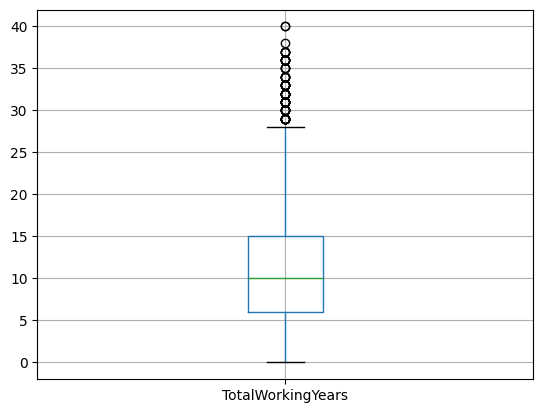

In [ ]:
df[['TotalWorkingYears']].boxplot()

<Axes: >

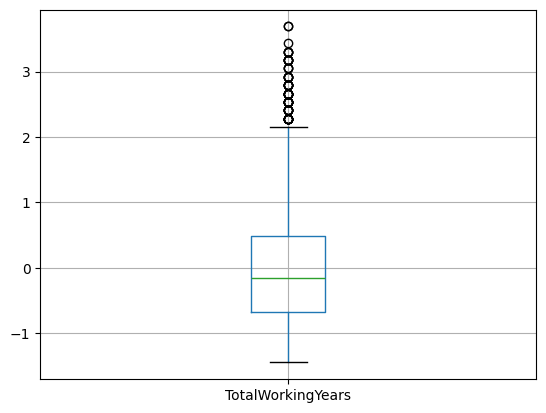

In [ ]:
df_std[['TotalWorkingYears']].boxplot()

## Find count of outliers in every column

In [ ]:
# Z-score method
for col in df_std.columns:
    out_count = df_std[col].loc[(df_std[col] > 3) | (df_std[col] <-3)].count()
    print(col, out_count)

Age 0
DailyRate 0
DistanceFromHome 0
Education 0
EmployeeCount 0
EmployeeNumber 0
EnvironmentSatisfaction 0
HourlyRate 0
JobInvolvement 0
JobLevel 0
JobSatisfaction 0
MonthlyIncome 0
MonthlyRate 0
NumCompaniesWorked 0
PercentSalaryHike 0
PerformanceRating 0
RelationshipSatisfaction 0
StandardHours 0
StockOptionLevel 0
TotalWorkingYears 16
TrainingTimesLastYear 0
WorkLifeBalance 0
YearsAtCompany 25
YearsInCurrentRole 13
YearsSinceLastPromotion 42
YearsWithCurrManager 14


In [ ]:
# IQR based method
for col in df_std.columns:
    q1,q3 = df_std[col].quantile([0.25,0.75])
    iqr = q3 - q1
    min_valid_val = q1 - 1.5*iqr
    max_valid_val = q3 + 1.5*iqr
    out_count = df_std[col].loc[(df_std[col] > max_valid_val)
                                | (df_std[col] <min_valid_val)].count()
    print(col, out_count)

Age 0
DailyRate 0
DistanceFromHome 0
Education 0
EmployeeCount 0
EmployeeNumber 0
EnvironmentSatisfaction 0
HourlyRate 0
JobInvolvement 0
JobLevel 0
JobSatisfaction 0
MonthlyIncome 114
MonthlyRate 0
NumCompaniesWorked 52
PercentSalaryHike 0
PerformanceRating 226
RelationshipSatisfaction 0
StandardHours 0
StockOptionLevel 85
TotalWorkingYears 63
TrainingTimesLastYear 238
WorkLifeBalance 0
YearsAtCompany 104
YearsInCurrentRole 21
YearsSinceLastPromotion 107
YearsWithCurrManager 14
